In [1]:
!pip install pmdarima

In [2]:
import pandas as pd 
import numpy as np

#EDA

In [3]:
df = pd.read_csv('RestaurantVisitors.csv', index_col='date', parse_dates=True)
df.index.freq = 'D'

In [4]:
df.head()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2016-01-01,Friday,1,New Year's Day,65.0,25.0,67.0,139.0,296.0
2016-01-02,Saturday,0,na,24.0,39.0,43.0,85.0,191.0
2016-01-03,Sunday,0,na,24.0,31.0,66.0,81.0,202.0
2016-01-04,Monday,0,na,23.0,18.0,32.0,32.0,105.0
2016-01-05,Tuesday,0,na,2.0,15.0,38.0,43.0,98.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 517 entries, 2016-01-01 to 2017-05-31
Freq: D
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   weekday       517 non-null    object 
 1   holiday       517 non-null    int64  
 2   holiday_name  517 non-null    object 
 3   rest1         478 non-null    float64
 4   rest2         478 non-null    float64
 5   rest3         478 non-null    float64
 6   rest4         478 non-null    float64
 7   total         478 non-null    float64
dtypes: float64(5), int64(1), object(2)
memory usage: 36.4+ KB


In [6]:
df1 =df.dropna()
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 478 entries, 2016-01-01 to 2017-04-22
Freq: D
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   weekday       478 non-null    object 
 1   holiday       478 non-null    int64  
 2   holiday_name  478 non-null    object 
 3   rest1         478 non-null    float64
 4   rest2         478 non-null    float64
 5   rest3         478 non-null    float64
 6   rest4         478 non-null    float64
 7   total         478 non-null    float64
dtypes: float64(5), int64(1), object(2)
memory usage: 33.6+ KB


In [7]:
df.columns

Index(['weekday', 'holiday', 'holiday_name', 'rest1', 'rest2', 'rest3',
       'rest4', 'total'],
      dtype='object')

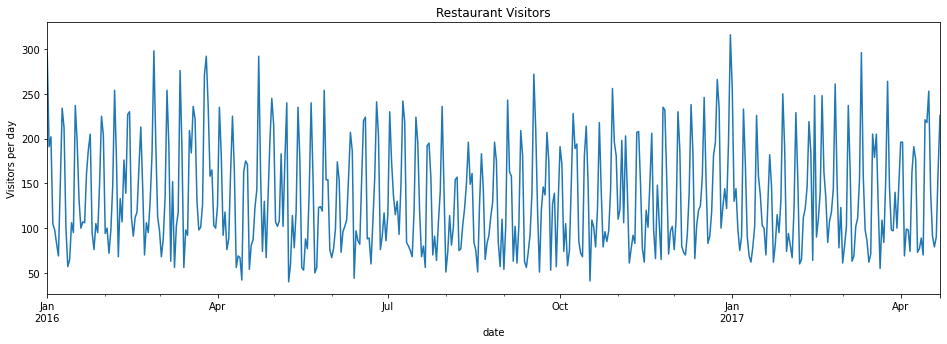

In [8]:
ax = df1['total'].plot(figsize=(16,5), title='Restaurant Visitors')
ax.autoscale(axis='x', tight=True)
ax.set(ylabel='Visitors per day');

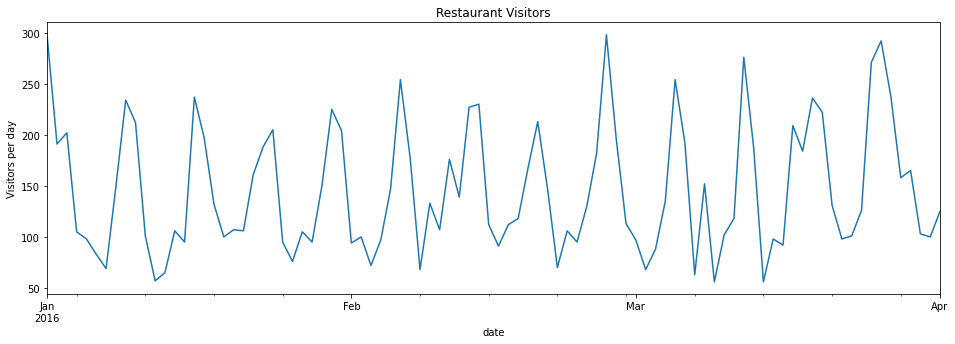

In [9]:
ax = df1['total'][:'2016-04-01'].plot(figsize=(16,5), title='Restaurant Visitors')
ax.autoscale(axis='x', tight=True)
ax.set(ylabel='Visitors per day');

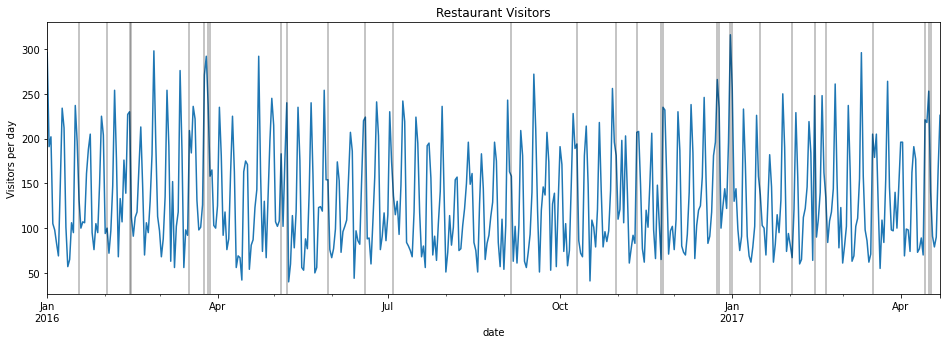

In [10]:
ax = df1['total'].plot(figsize=(16,5),title='Restaurant Visitors')
ax.autoscale(axis='x',tight=True)
ax.set(ylabel='Visitors per day')
for x in df1.query('holiday==1').index:       
    ax.axvline(x=x, color='k', alpha = 0.3);

#ETS (Error-Trend-Seasonality) decomposition


In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose

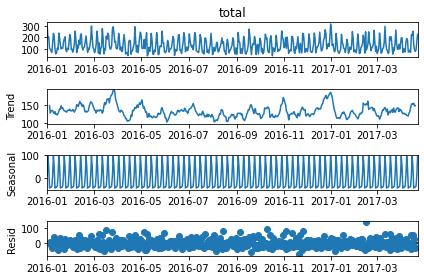

In [12]:
res = seasonal_decompose(df1['total'])
res.plot();

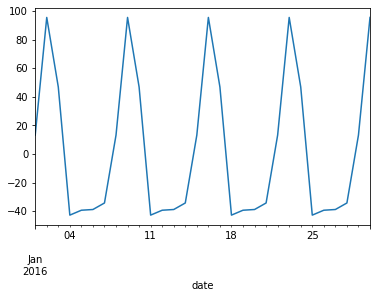

In [13]:
res.seasonal[:30].plot()

#Run SARIMA

In [14]:
from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [15]:
auto_arima(df1['total'], seasonal=True, trace=True, m=7).summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[7] intercept   : AIC=inf, Time=3.17 sec
 ARIMA(0,0,0)(0,0,0)[7] intercept   : AIC=5269.484, Time=0.03 sec
 ARIMA(1,0,0)(1,0,0)[7] intercept   : AIC=4916.749, Time=0.91 sec
 ARIMA(0,0,1)(0,0,1)[7] intercept   : AIC=5049.644, Time=0.59 sec
 ARIMA(0,0,0)(0,0,0)[7]             : AIC=6126.084, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[7] intercept   : AIC=5200.790, Time=0.13 sec
 ARIMA(1,0,0)(2,0,0)[7] intercept   : AIC=4845.442, Time=2.42 sec
 ARIMA(1,0,0)(2,0,1)[7] intercept   : AIC=4921.866, Time=6.35 sec
 ARIMA(1,0,0)(1,0,1)[7] intercept   : AIC=4788.853, Time=3.24 sec
 ARIMA(1,0,0)(0,0,1)[7] intercept   : AIC=5058.642, Time=1.65 sec
 ARIMA(1,0,0)(1,0,2)[7] intercept   : AIC=4951.692, Time=6.21 sec
 ARIMA(1,0,0)(0,0,2)[7] intercept   : AIC=4982.776, Time=3.56 sec
 ARIMA(1,0,0)(2,0,2)[7] intercept   : AIC=inf, Time=9.59 sec
 ARIMA(0,0,0)(1,0,1)[7] intercept   : AIC=4775.690, Time=3.19 sec
 ARIMA(0,0,0)(0,0,1)[7] intercept   : AIC=5

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 SARIMAX Results                                 
=================================================================================
Dep. Variable:                         y   No. Observations:                  478
Model:             SARIMAX(1, 0, [1], 7)   Log Likelihood               -2383.845
Date:                   Sun, 13 Feb 2022   AIC                           4775.690
Time:                           17:55:01   BIC                           4792.369
Sample:                                0   HQIC                          4782.247
                                   - 478                                         
Covariance Type:                     opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      4.7613      1.654      2.878      0.004       1.519       8.003
ar.S.L7        0.9624      0.013     75.584      0.000       0.937       0.987
ma.S.L7       -0.7581      0.048    -15.672      0.000      -0.853      -0.663
sigma2      1205.5235     70.693     17.053      0.000    1066.968    1344.079
===================================================================================
Ljung-Box (L1) (Q):                  16.20   Jarque-Bera (JB):                64.91
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.85   Skew:                             0.75
Prob(H) (two-sided):                  0.32   Kurtosis:                         3.99
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [16]:
len(df1)

478

In [17]:
# Set four weeks for testing
train = df1.iloc[:436]
test = df1.iloc[436:]

In [18]:
model = SARIMAX(train['total'],order=(0,0,0),seasonal_order=(1,0,1,7),enforce_invertibility=False)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 SARIMAX Results                                 
=================================================================================
Dep. Variable:                     total   No. Observations:                  436
Model:             SARIMAX(1, 0, [1], 7)   Log Likelihood               -2165.369
Date:                   Sun, 13 Feb 2022   AIC                           4336.738
Time:                           17:55:02   BIC                           4348.970
Sample:                       01-01-2016   HQIC                          4341.565
                            - 03-11-2017                                         
Covariance Type:                     opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L7        0.9999   9.56e-05   1.05e+04      0.000       1.000       1.000
ma.S.L7       -0.9384      0.024    -39.211      0.000      -0.985      -0.891
sigma2      1111.8035     58.742     18.927      0.000     996.672    1226.935
===================================================================================
Ljung-Box (L1) (Q):                  15.40   Jarque-Bera (JB):                83.57
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.96   Skew:                             0.72
Prob(H) (two-sided):                  0.81   Kurtosis:                         4.59
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [19]:
start=len(train)
end=len(train)+len(test)-1
predictions = results.predict(start=start, end=end, dynamic=False).rename('SARIMA(0,0,0)(1,0,1,7) Predictions')

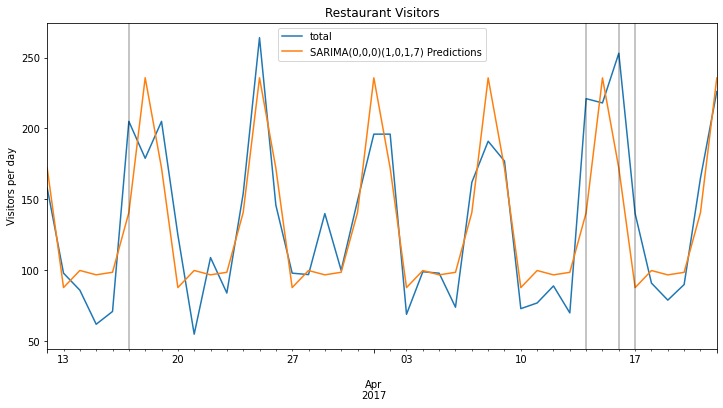

In [20]:
title='Restaurant Visitors'
ylabel='Visitors per day'
xlabel=''

ax = test['total'].plot(legend=True,figsize=(12,6),title=title)
predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
for x in test.query('holiday==1').index: 
    ax.axvline(x=x, color='k', alpha = 0.3);

##Evaluating the model

In [21]:
from statsmodels.tools.eval_measures import mse,rmse

In [22]:
error1 = mse(test['total'], predictions)
error2 = rmse(test['total'], predictions)

print(f'SARIMA(0,0,0)(1,0,1,7) MSE Error: {error1:11.10}')
print(f'SARIMA(0,0,0)(1,0,1,7) RMSE Error: {error2:11.10}')

SARIMA(0,0,0)(1,0,1,7) MSE Error: 1018.360393
SARIMA(0,0,0)(1,0,1,7) RMSE Error: 31.91175948


#USING EXOG VARIABLE IN SARIMA:SARIMAX

In [23]:
model = SARIMAX(train['total'],exog=train['holiday'],order=(0,0,0),seasonal_order=(1,0,1,7),enforce_invertibility=False)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 SARIMAX Results                                 
=================================================================================
Dep. Variable:                     total   No. Observations:                  436
Model:             SARIMAX(1, 0, [1], 7)   Log Likelihood               -2098.580
Date:                   Sun, 13 Feb 2022   AIC                           4205.160
Time:                           17:55:03   BIC                           4221.470
Sample:                       01-01-2016   HQIC                          4211.596
                            - 03-11-2017                                         
Covariance Type:                     opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
holiday       70.0750      3.972     17.640      0.000      62.289      77.861
ar.S.L7        1.0000   4.72e-05   2.12e+04      0.000       1.000       1.000
ma.S.L7       -1.0463      0.024    -42.751      0.000      -1.094      -0.998
sigma2       739.3345     49.502     14.935      0.000     642.312     836.357
===================================================================================
Ljung-Box (L1) (Q):                  15.36   Jarque-Bera (JB):                21.14
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.01   Skew:                             0.23
Prob(H) (two-sided):                  0.96   Kurtosis:                         3.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [24]:
start=len(train)
end=len(train)+len(test)-1
exog_forecast = test[['holiday']] 
predictions = results.predict(start=start, end=end, exog=exog_forecast).rename('SARIMAX(0,0,0)(1,0,1,7) Predictions')

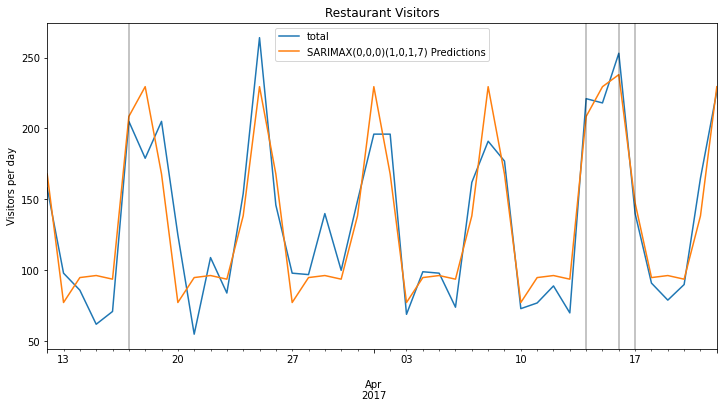

In [25]:
title='Restaurant Visitors'
ylabel='Visitors per day'
xlabel=''

ax = test['total'].plot(legend=True,figsize=(12,6),title=title)
predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
for x in test.query('holiday==1').index: 
    ax.axvline(x=x, color='k', alpha = 0.3);

##Evaluating the model

In [26]:
print(f'SARIMA(0,0,0)(1,0,1,7) MSE Error: {error1:11.10}')
print(f'SARIMA(0,0,0)(1,0,1,7) RMSE Error: {error2:11.10}')
print()

error1x = mse(test['total'], predictions)
error2x = rmse(test['total'], predictions)

# Print new SARIMAX values
print(f'SARIMAX(0,0,0)(1,0,1,7) MSE Error: {error1x:11.10}')
print(f'SARIMAX(0,0,0)(1,0,1,7) RMSE Error: {error2x:11.10}')

SARIMA(0,0,0)(1,0,1,7) MSE Error: 1018.360393
SARIMA(0,0,0)(1,0,1,7) RMSE Error: 31.91175948

SARIMAX(0,0,0)(1,0,1,7) MSE Error: 520.3639365
SARIMAX(0,0,0)(1,0,1,7) RMSE Error: 22.81148694


#Forecasting

In [27]:
model = SARIMAX(df1['total'],exog=df1['holiday'],order=(0,0,0),seasonal_order=(1,0,1,7),enforce_invertibility=False)
results = model.fit()
exog_forecast = df[478:][['holiday']]
fcast = results.predict(len(df1),len(df1)+38,exog=exog_forecast).rename('SARIMAX(0,0,0)(1,0,1,7) Forecast')

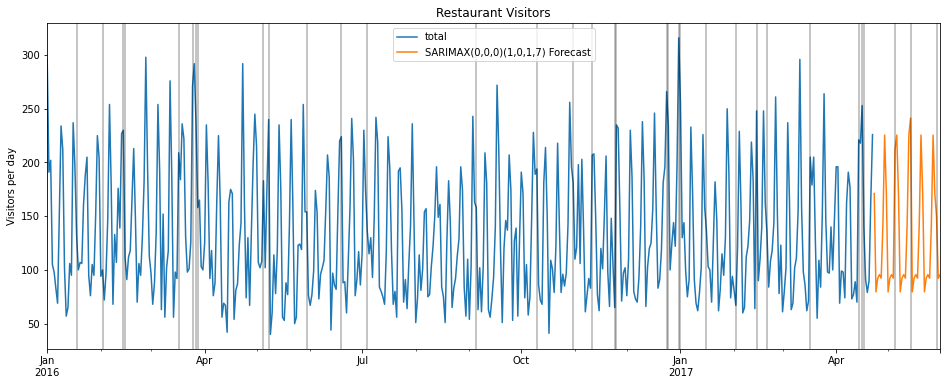

In [28]:
title='Restaurant Visitors'
ylabel='Visitors per day'
xlabel=''

ax = df1['total'].plot(legend=True,figsize=(16,6),title=title)
fcast.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
for x in df.query('holiday==1').index: 
    ax.axvline(x=x, color='k', alpha = 0.3);